In [35]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
file=r"C:\Users\LENOVO\Desktop\car data.csv"

In [37]:
df=pd.read_csv(file)

In [56]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
df.Selling_Price.describe

<bound method NDFrame.describe of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>

In [58]:
df.shape

(301, 9)

In [59]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [65]:
plt.rcParams["figure.figsize"] = (10,3)

Text(0.5, 1.0, 'Number of cars with different fuel type')

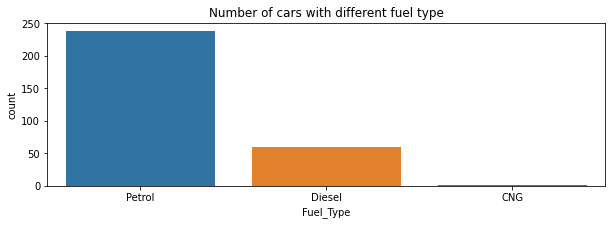

In [66]:
sns.countplot(data=df,x="Fuel_Type")
plt.title("Number of cars with different fuel type")

Text(0.5, 1.0, 'Number of cars with different Seller type')

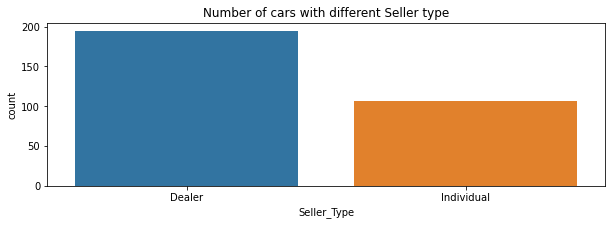

In [67]:
sns.countplot(data=df,x="Seller_Type")
plt.title("Number of cars with different Seller type")

Text(0.5, 1.0, 'Number of cars in different years')

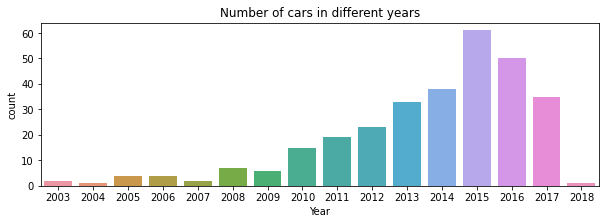

In [68]:
sns.countplot(data=df,x="Year")
plt.title("Number of cars in different years")

In [70]:
#removing name from dataset since it's a unique identifier for each row
df = df.drop('Car_Name',axis=1)

In [71]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [76]:
#changing categorical to dummy variables
df1 = pd.get_dummies(df["Fuel_Type"])

In [77]:
df1.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [79]:
df=pd.concat([df,df1],axis=1)

In [80]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0


In [81]:
df.corr()["Selling_Price"]

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
CNG             -0.025164
Diesel           0.552339
Petrol          -0.540571
Name: Selling_Price, dtype: float64

Text(0.5, 1.0, 'Comparison of selling price and actual price of cars')

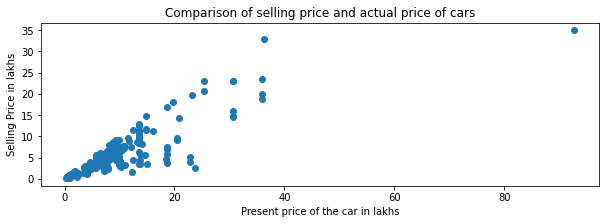

In [85]:
plt.scatter(data=df,x="Present_Price",y="Selling_Price")
plt.ylabel("Selling Price in lakhs")
plt.xlabel("Present price of the car in lakhs")
plt.title("Comparison of selling price and actual price of cars")

Text(0.5, 1.0, 'Comparison of Distance travelled by car and selling price of cars')

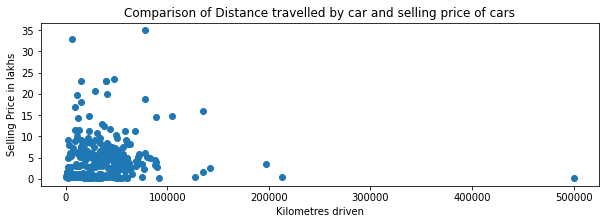

In [88]:
plt.scatter(data=df,x="Kms_Driven",y="Selling_Price")
plt.ylabel("Selling Price in lakhs")
plt.xlabel("Kilometres driven")
plt.title("Comparison of Distance travelled by car and selling price of cars")

In [89]:
X=df[["Year","Present_Price","Kms_Driven"]]

In [90]:
Y=df[["Selling_Price"]]

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [92]:
regr=linear_model.LinearRegression()

In [93]:
regr.fit(X_train,Y_train)

LinearRegression()

In [96]:
yhat=regr.predict(X_test)
yhat
#Predicted values

array([[ 4.33598607],
       [ 6.40961641],
       [ 3.97838477],
       [ 4.97139748],
       [ 4.98803704],
       [ 0.7986283 ],
       [ 1.70698892],
       [ 0.76964467],
       [ 5.26570743],
       [ 2.75857446],
       [ 0.84499312],
       [ 3.64504773],
       [ 5.46177533],
       [ 5.9057569 ],
       [ 5.27449561],
       [-2.04495595],
       [ 8.67528949],
       [ 2.68987906],
       [ 4.402208  ],
       [ 6.13516361],
       [19.26241258],
       [ 2.13454901],
       [ 2.21734742],
       [ 1.22551595],
       [ 7.0638248 ],
       [ 5.88384371],
       [ 2.15015113],
       [ 1.86954022],
       [ 7.68393987],
       [ 4.35195789],
       [ 1.38345744],
       [ 4.27331401],
       [-1.68731342],
       [ 2.65238796],
       [ 6.91155508],
       [ 6.36308034],
       [ 1.34403595],
       [ 3.41444983],
       [ 6.72319878],
       [ 9.16105352],
       [ 2.93456912],
       [ 8.67041117],
       [ 4.49511403],
       [ 0.98661943],
       [ 0.85887759],
       [ 2

Text(0.5, 1.0, 'Residual plot')

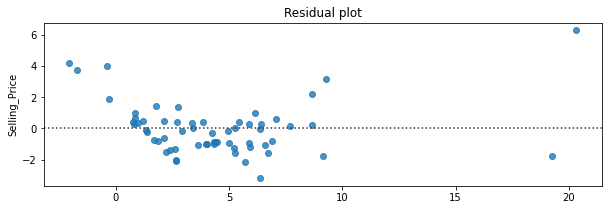

In [107]:

sns.residplot(x=yhat, y=Y_test)
plt.title("Residual plot")

Evaluating the model

In [108]:
from sklearn.metrics import r2_score
r2_score(Y_test,yhat)

0.835533855289418

In [109]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,yhat)

1.314887164059757

In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,yhat)

4.993070578412559